# Introduction to statistics with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

## The data

National Survey of Family Growth, taken from https://github.com/AllenDowney/ThinkStats2


* `caseid` is the integer ID of the respondent.
* `prglngth` is the integer duration of the pregnancy in weeks.
* `outcome` is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.
* `pregordr` is a pregnancy serial number; for example, the code for a respondent’s first pregnancy is 1, for the second pregnancy is 2, and so on.
* `birthord` is a serial number for live births; the code for a respondent’s first child is 1, and so on. For outcomes other than live birth, this field is blank.
* `birthwgt_lb` and birthwgt_oz contain the pounds and ounces parts of the birth weight of the baby.
* `agepreg` is the mother’s age at the end of the pregnancy.
* `finalwgt` is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S. population this respondent represents.
* `poverty`: poverty level income

More information at https://www.icpsr.umich.edu/icpsradmin/nsfg/search

In [1]:
import pandas as pd

df = pd.read_csv('../data/nsfg.csv')
df.shape

(13593, 244)

In [2]:
df['birthwgt_lb']

0        8.0
1        7.0
2        9.0
3        7.0
4        6.0
        ... 
13588    6.0
13589    NaN
13590    NaN
13591    7.0
13592    7.0
Name: birthwgt_lb, Length: 13593, dtype: float64

## `matplotlib`

We are only going to use the most basic functions of matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
plt.style.use('seaborn')


### Histogram

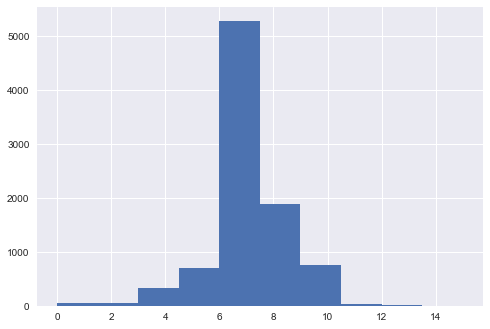

In [4]:
plt.hist(df['birthwgt_lb']);

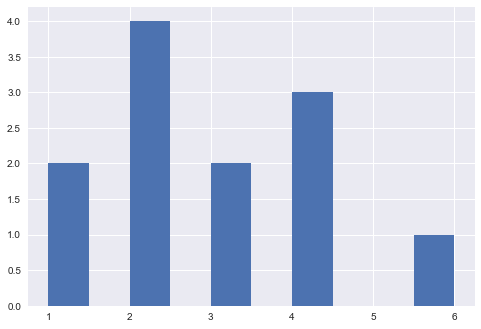

In [5]:
plt.hist([1,2,3,3,2,2,2,1,4,6,4,4]);

### Bar plot

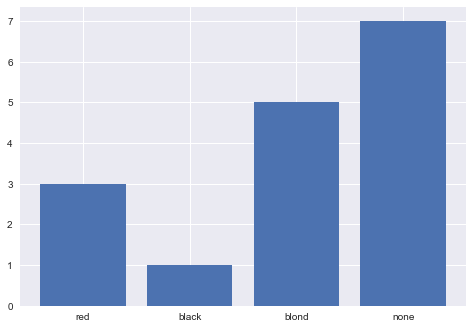

In [6]:
plt.bar(range(4), [3, 1, 5, 7])
plt.xticks(range(4), labels = ['red', 'black', 'blond', 'none']);

In [7]:
df['birthwgt_g'] = df['birthwgt_lb'] * 454 + df['birthwgt_oz'] * 28.35

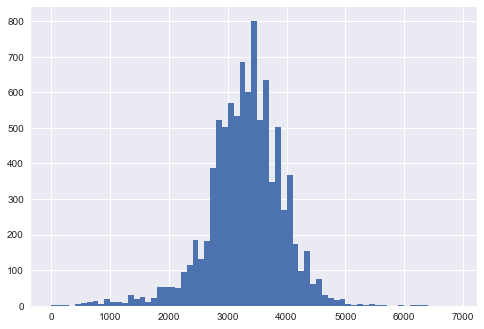

In [8]:
plt.hist(df['birthwgt_g'], bins=np.arange(0, 7000, 100));

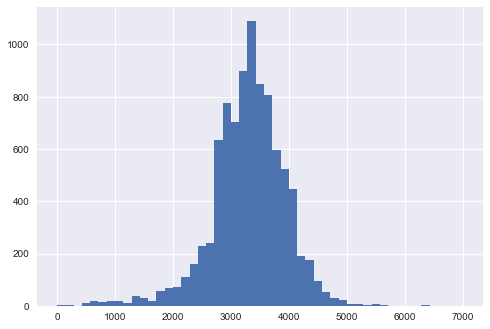

In [9]:
plt.hist(df['birthwgt_g'], bins=np.linspace(0, 7000, 50));

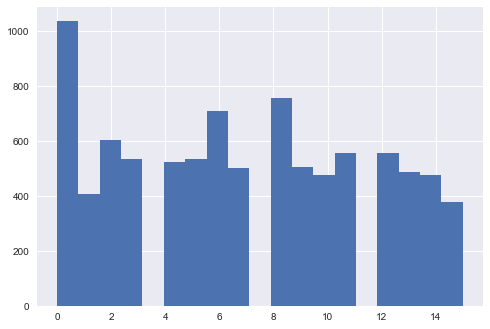

In [10]:
plt.hist(df['birthwgt_oz'], bins=np.linspace(0, 15, 20));

### Scatter plot

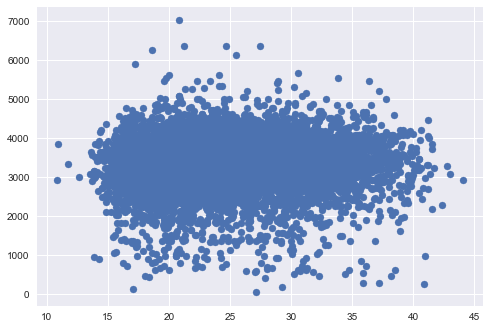

In [11]:
plt.scatter(df['agepreg'], df['birthwgt_g']);

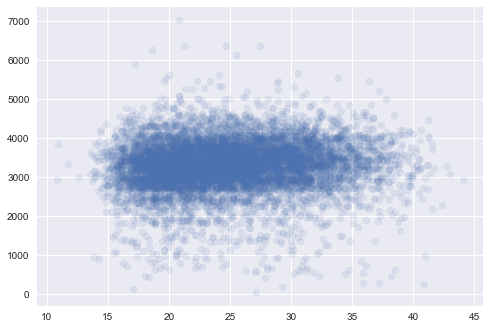

In [12]:
plt.scatter(df['agepreg'], df['birthwgt_g'], alpha=.1);

## Descriptive statistics

### Measures of centrality

#### Average

$$\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}$$

#### Median

50th percentile

In [13]:
df['birthwgt_g'].mean()

3298.42237220624

In [14]:
df['birthwgt_g'].median()

3348.1

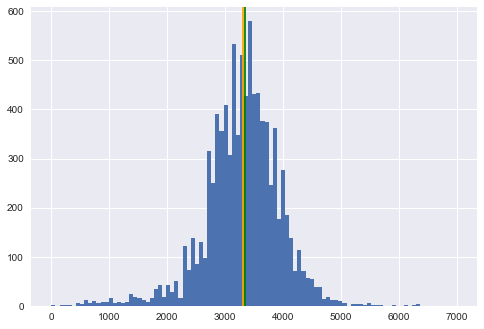

In [15]:
plt.hist(df['birthwgt_g'], bins=np.linspace(0, 7000, 100));
plt.axvline(df['birthwgt_g'].mean(), color='orange')
plt.axvline(df['birthwgt_g'].median(), color='green')

### Measures of dispersion

#### Variance and standard deviation

$$v_x = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$$

$$\sigma_x = \sqrt{v_x}$$

In [16]:
diffs = (df['birthwgt_g'] - df['birthwgt_g'].mean()).dropna()
var = diffs.dot(diffs) / diffs.size
var

408728.8667588338

In [17]:
np.sqrt(var)

639.3190649111239

### z-score

$$z_i = \frac{x_i - \mu}{\sigma}$$

#### Exercise

Calculate the z-scores of every `birthweight_g` and plot them like we have just done.

In [18]:
df['birthwgt_g'].head()

0    4000.55
1    3574.90
2    4142.70
3    3178.00
4    2809.05
Name: birthwgt_g, dtype: float64

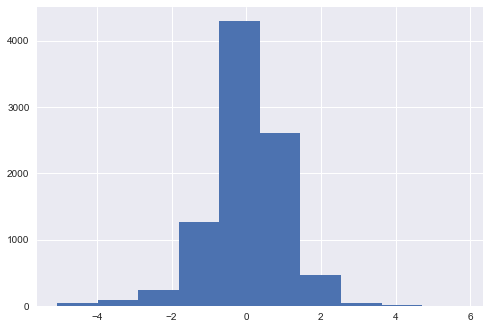

In [19]:
zs = (df['birthwgt_g'] - df['birthwgt_g'].mean()) / df['birthwgt_g'].std()

plt.hist(zs);


## Correlation and covariance

Let's make up some data to play around:

(array([ 90., 104., 119., 104.,  85.,  98., 110.,  89., 115.,  86.]),
 array([-199.88210833, -140.14026151,  -80.39841469,  -20.65656787,
          39.08527895,   98.82712577,  158.56897259,  218.31081941,
         278.05266623,  337.79451305,  397.53635987]),
 <BarContainer object of 10 artists>)

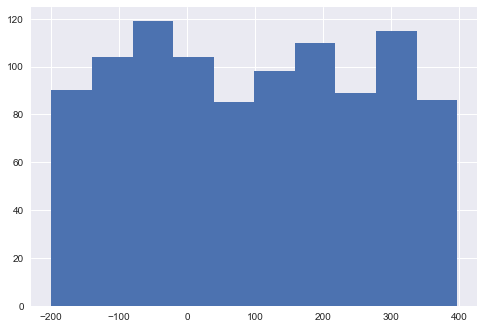

In [20]:
n = 1000
xs = np.random.uniform(-200, 400, size=n)
plt.hist(xs)

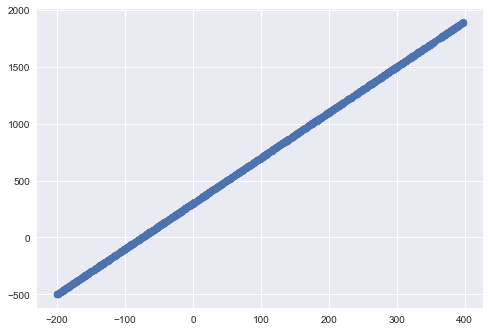

In [21]:
ys = 4 * xs + 300
plt.scatter(xs, ys)

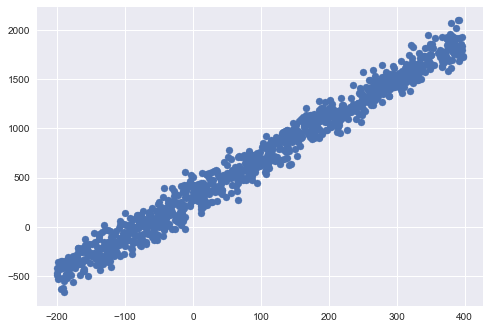

In [22]:
ys = 4 * xs + 300 + np.random.randn(n) * 100
plt.scatter(xs, ys)

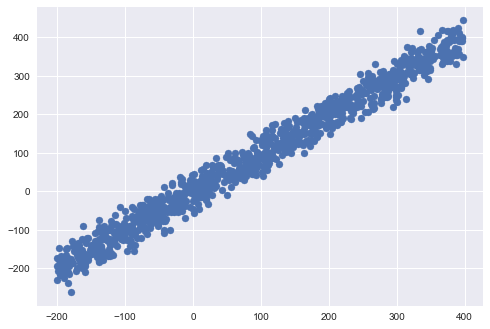

In [23]:
def jitter(series, noise_factor=0.1):
    return series + np.random.randn(series.size) * noise_factor * (series.mean() + series.std())

plt.scatter(xs, jitter(xs))

#### Exercise

Make three series ys1, ys2, ys3 that have a linear, quadratic and cubic relationship to xs.

The coefficients should be:

```python
x_0 = 200
x_1 = 13
x_2 = 3
x_3 = .2
```

In [24]:
xs.shape

(1000,)

In [25]:
x_0 = 200
x_1 = 13
x_2 = 3
x_3 = .2

ys1 = jitter(x_0 + x_1 * xs)
ys2 = jitter(x_0 + x_1 * xs + x_2 * xs ** 2)
ys3 = jitter(x_0 + x_1 * xs + x_2 * xs ** 2 + x_3 + xs ** 3)



Let's plot them

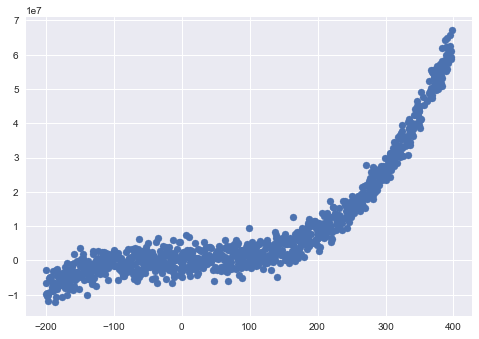

In [26]:
plt.scatter(xs, ys3)

### Covariance

$$cov_{x,y}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n}$$


A measure of how much two variables change together. It is a dot product, so the covariance is
maximized if the two vectors are identical, 0 if they are orthogonal, and 98 Chapter 7. Relationships between variables negative if they point in opposite directions.

In [27]:
x_diffs = xs - xs.mean()
y_diffs = ys1 - ys1.mean()
x_diffs.dot(y_diffs) / x_diffs.size

384196.46899650036

In [28]:
all_vars = np.array([xs, ys1, ys2, ys3])

In [29]:
np.cov(all_vars)

array([[2.93857993e+04, 3.84581050e+05, 1.76003820e+07, 2.39942692e+09],
       [3.84581050e+05, 5.17320172e+06, 2.29432409e+08, 3.13285970e+10],
       [1.76003820e+07, 2.29432409e+08, 1.70769084e+10, 2.03059310e+12],
       [2.39942692e+09, 3.13285970e+10, 2.03059310e+12, 2.77456348e+14]])

### Correlation and dependence

#### Pearson correlation coefficient


$$ r = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^2}} $$


Pretty ugly, huh? But fear not! Remember:


$$v_x = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$$

$$\sigma_x = \sqrt{v_x}$$

In [30]:
stats.pearsonr(xs, ys1), stats.pearsonr(xs, -ys1)

((0.9863690132760417, 0.0), (-0.9863690132760417, 0.0))

In [31]:
np.corrcoef(all_vars)

array([[1.        , 0.98636901, 0.78568546, 0.84031369],
       [0.98636901, 1.        , 0.7719167 , 0.82692078],
       [0.78568546, 0.7719167 , 1.        , 0.93286962],
       [0.84031369, 0.82692078, 0.93286962, 1.        ]])

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

<AxesSubplot:>

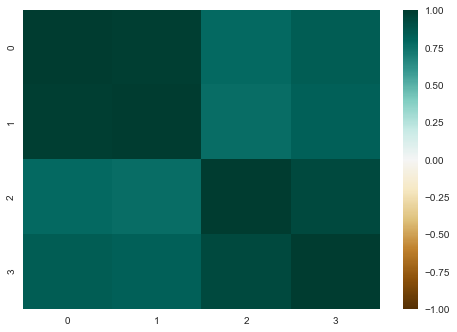

In [32]:
sns.heatmap(np.corrcoef(all_vars), vmin=-1, vmax=1, cmap='BrBG')

![Pearson correlations](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

#### Spearman correlation coefficient

In [33]:
stats.spearmanr(xs, ys1)

SpearmanrResult(correlation=0.986953262953263, pvalue=0.0)

In [34]:
stats.pearsonr(xs, ys1)

(0.9863690132760417, 0.0)

In [35]:
stats.pearsonr(xs, ys3), stats.spearmanr(xs, ys3)

((0.8403136935930965, 1.2281492002981828e-267),
 SpearmanrResult(correlation=0.9035007515007515, pvalue=0.0))

## Probability

Let's play with a coin

In [36]:
import random 

n = 1000
p = .5
random.random() > p

heads = sum([random.random() > p for _ in range(n)])
heads

527

In [37]:
observations = 350
results = []

for _ in range(observations):
    results.append(sum([random.random() > p for _ in range(n)]))
    
results

[490,
 504,
 499,
 490,
 496,
 479,
 484,
 482,
 503,
 505,
 513,
 482,
 492,
 518,
 461,
 518,
 474,
 481,
 508,
 489,
 532,
 496,
 524,
 490,
 519,
 497,
 501,
 518,
 493,
 509,
 513,
 503,
 496,
 491,
 471,
 534,
 498,
 501,
 510,
 531,
 513,
 507,
 497,
 496,
 511,
 487,
 449,
 488,
 490,
 494,
 485,
 502,
 465,
 520,
 515,
 494,
 513,
 506,
 499,
 483,
 490,
 491,
 482,
 492,
 487,
 476,
 511,
 497,
 492,
 489,
 515,
 488,
 483,
 459,
 501,
 510,
 520,
 516,
 511,
 487,
 515,
 512,
 490,
 510,
 516,
 496,
 489,
 509,
 493,
 497,
 465,
 506,
 489,
 511,
 489,
 511,
 512,
 503,
 466,
 499,
 491,
 504,
 496,
 505,
 524,
 483,
 491,
 474,
 504,
 516,
 495,
 503,
 500,
 514,
 504,
 479,
 491,
 508,
 507,
 482,
 473,
 503,
 496,
 501,
 528,
 492,
 498,
 466,
 511,
 519,
 517,
 519,
 529,
 488,
 520,
 504,
 480,
 505,
 493,
 478,
 492,
 500,
 496,
 486,
 512,
 485,
 472,
 495,
 521,
 493,
 517,
 480,
 504,
 503,
 495,
 488,
 488,
 473,
 530,
 501,
 502,
 514,
 475,
 495,
 516,
 503,
 480

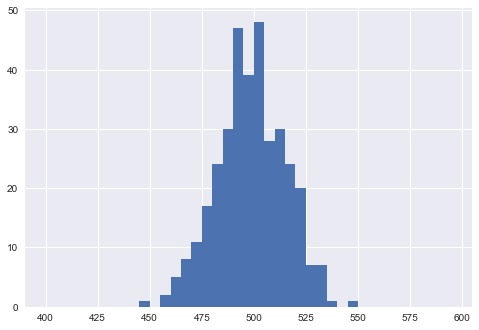

In [38]:
plt.hist(results, bins = range(400, 600, 5));

Now with numpy

(array([ 1.,  0.,  5.,  0., 12.,  0., 59.,  0., 75., 98.]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 10 artists>)

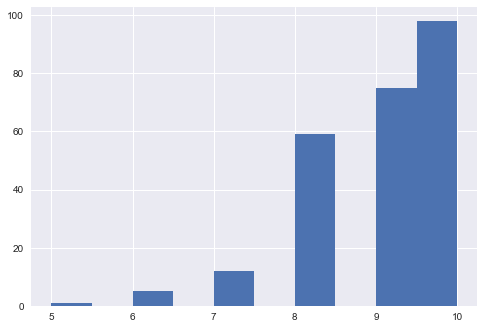

In [39]:
n = 10
p = .9
size = 250

tries = np.random.binomial(n, p, size = 250)
plt.hist(tries)

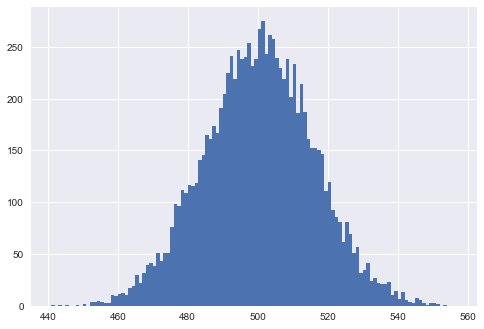

In [40]:
n = 1000
p = .5


size = 10000

tries = np.random.binomial(n, p, size = size)
plt.hist(tries, bins=range(tries.min(), tries.max()));

#### Exercise

The p-value is a widely used (and criticized) measure of how surprising an observation is under a given set of assumptions.

It is defined as "the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct" [1](https://en.wikipedia.org/wiki/P-value).

Let's play with a lot of coins. Calculate experimentally the p-value of getting 120 heads when launching 1000 heavily weighted coinds, each with a $p_{heads}=0.1$.


In [41]:
n = 1000
p = .1

tries = np.random.binomial(n, p, size = size)

(tries >= 120).mean()

0.0226

Otra manera:

In [42]:
unique, counts = np.unique(tries, return_counts=True)
unique, counts 

(array([ 60,  64,  67,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 134, 137, 140]),
 array([  1,   1,   1,   1,   2,   5,   5,   4,   5,  17,  21,  24,  30,
         35,  59,  63,  70,  94,  96, 114, 154, 182, 201, 215, 266, 271,
        287, 309, 356, 384, 373, 419, 399, 415, 423, 408, 431, 403, 374,
        359, 327, 294, 279, 254, 231, 181, 188, 157, 131, 112, 112,  94,
         74,  63,  37,  45,  34,  31,  13,  22,  10,  11,   5,   7,   2,
          4,   2,   1,   1,   1]))

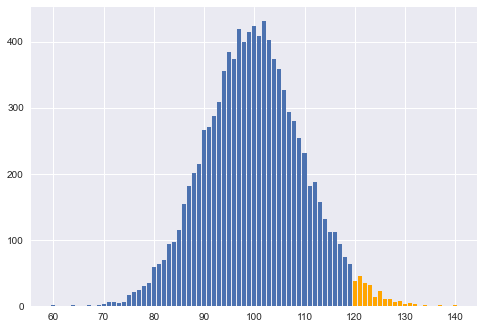

In [43]:
good = unique >= 120
plt.bar(unique[~good], counts[~good])
plt.bar(unique[good], counts[good], color='orange');

### Intersection

In [75]:
n = 1000
p = .5

left = np.random.uniform(size=1000) < p
right = np.random.uniform(size=1000) < p
left.mean(), right.mean()

(0.532, 0.515)

In [46]:
left and right

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [76]:
(left & right).sum()

276

Let's play with loaded coins

In [77]:
n = 1000
p = .3

left = np.random.uniform(size=1000) < p
right = np.random.uniform(size=1000) < p
left.mean(), right.mean(), (left & right).mean(), left.mean() * right.mean()

(0.277, 0.283, 0.08, 0.078391)

### Union

In [78]:
n = 1000
p = .3

left = np.random.uniform(size=1000) < p
right = np.random.uniform(size=1000) < p
left.mean(), right.mean(), (left | right).mean()

(0.286, 0.297, 0.494)

### Conditional Probability


$$P(A\mid B) = \frac{P(A\cap B)}{P(B)}$$


### Independent events

Definition:

$$P(A\mid B) = P(A)$$

Properties:

$$P(A \cap B) = P(A) \cdot P(B)$$

$$P(A \mid B) = P(A)$$

$$P(B \mid A) = P(B)$$

### Law of total probability

$$P(S) = \sum_{i=1}^n P(S \mid S_i)P(S_i)$$

### Bayes theorem

$$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$$

## Random variable


https://docs.scipy.org/doc/scipy/reference/stats.html

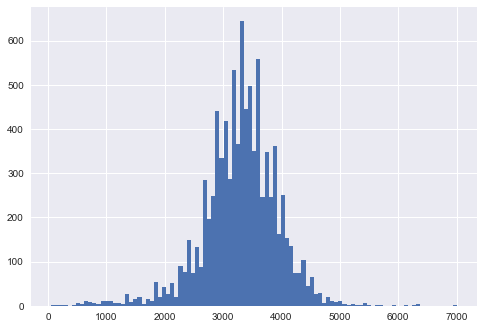

In [79]:
plt.hist(df['birthwgt_g'], bins = np.linspace(df['birthwgt_g'].min(), df['birthwgt_g'].max(), 100));

## Discrete and continuous variables

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete

### Discrete variables



<BarContainer object of 19 artists>

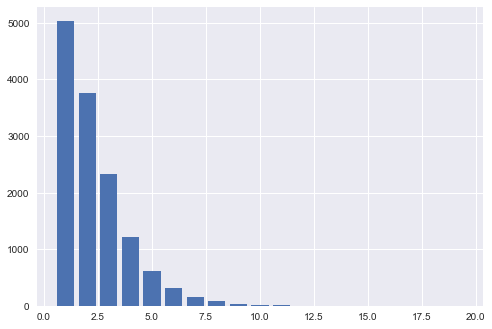

In [80]:
xs, ys = np.unique(df['pregordr'], return_counts=True)
plt.bar(xs, ys)

<BarContainer object of 19 artists>

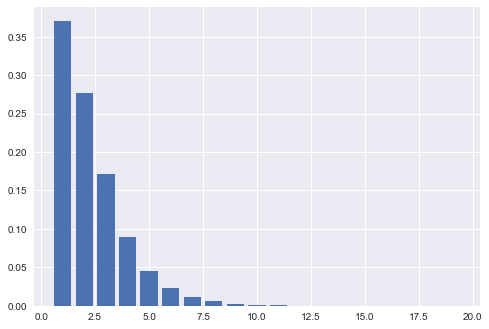

In [81]:
plt.bar(xs, ys / ys.sum())

### Binomial Distribution

In [82]:
n = 8
p = .5

binom = stats.binom(n, p)

### Generating random observations

In [83]:
binom.rvs(10000)

array([4, 4, 4, ..., 2, 4, 3])

#### pmf

Probability Mass Function

In [84]:
binom.pmf(4)

0.27343750000000017

In [85]:
binom.pmf(2)

0.10937500000000006

#### Exercise

What is the probability of getting 3 or fewer heads when tossing 8 times a fair coin?

In [86]:
binom.pmf(range(4)).sum()

0.3632812500000002

<BarContainer object of 9 artists>

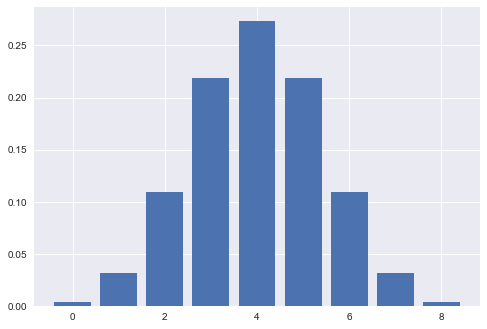

In [87]:
xs = range(n + 1)
ys = binom.pmf(xs)

plt.bar(xs, ys)

#### cdf

Cumulative Distribution Function

0.3632812500000001

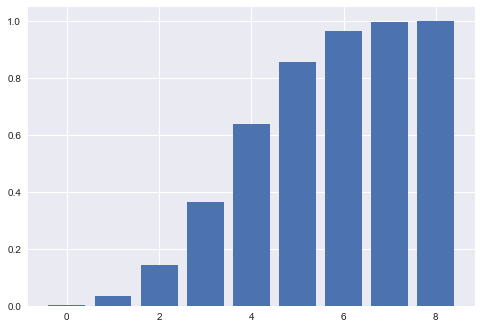

In [88]:
xs = range(n + 1)
ys = binom.cdf(xs)

plt.bar(xs, ys)
binom.cdf(3)

### Poisson

### Continuous distributions



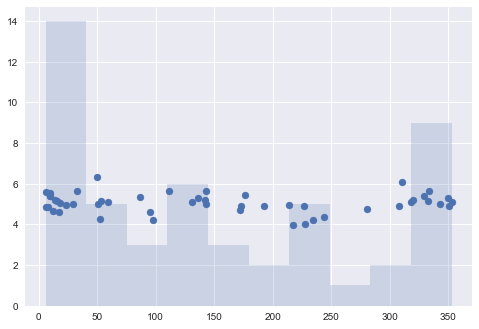

In [89]:
left, right = 0, 360
n = 50
uniform = stats.uniform(left, right - left)
rs = uniform.rvs(size=n)

plt.hist(rs, alpha=.2)
irrelevant = jitter(np.repeat(n / 10, rs.size))
plt.scatter(rs, irrelevant)

What is the probabilty of `uniform` being exactly 0?

In [90]:
left, right = 0, 360
n = 1000000000
uniform = stats.uniform(left, right - left)
rs = uniform.rvs(size=n)

(rs == 0.0).sum()

0

#### pdf


Probability Density Function

In [91]:
uniform.pdf(0)

0.002777777777777778

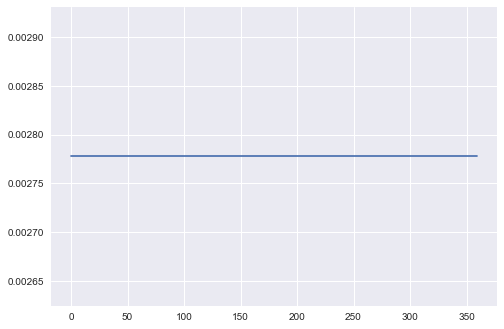

In [92]:
plt.plot(range(360), uniform.pdf(range(360)));

In [93]:
uniform.pdf(range(360)).sum()

1.0

In [94]:
uniform.pdf(np.linspace(0, 360, 1000)).sum()

2.777777777777777

In [95]:
uniform.cdf(20)

0.05555555555555555

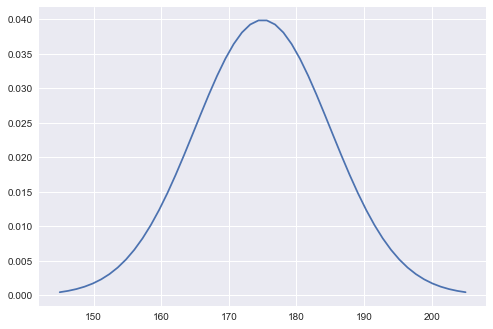

In [96]:
normal = stats.norm(175, 10)
xs = np.linspace(145, 205)

plt.plot(xs, normal.pdf(xs))

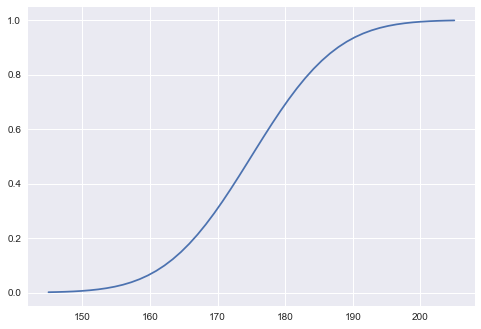

In [97]:
plt.plot(xs, normal.cdf(xs))

In [98]:
normal.cdf(150)

0.006209665325776132

In [99]:
normal.cdf(185) - normal.cdf(165)

0.6826894921370859

#### Exercise

What is the probability of `uniform` taking a value between 10 and 15?

### Normal

#### Exercise

Approximate the shaded area below the curve using `normal.pdf(xs)`

#### Checking normality

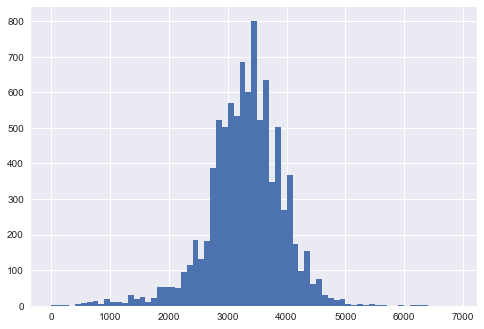

In [102]:
plt.hist(df['birthwgt_g'], bins=range(0, 7000, 100));

In [105]:
df['birthwgt_g'].mean(), df['birthwgt_g'].std()

(3298.42237220624, 639.3544362389836)

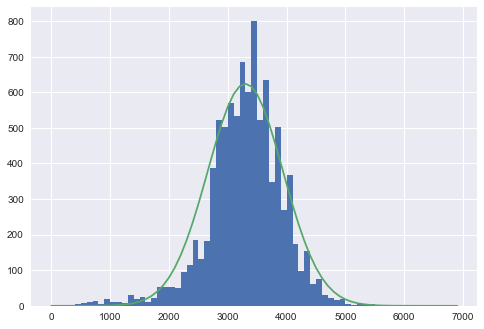

In [111]:
norm_like_weight = stats.norm(df['birthwgt_g'].mean(), df['birthwgt_g'].std())

plt.hist(df['birthwgt_g'], bins=range(0, 7000, 100));
plt.plot(range(0, 7000, 100), norm_like_weight.pdf(np.arange(0, 7000, 100))*1e6)

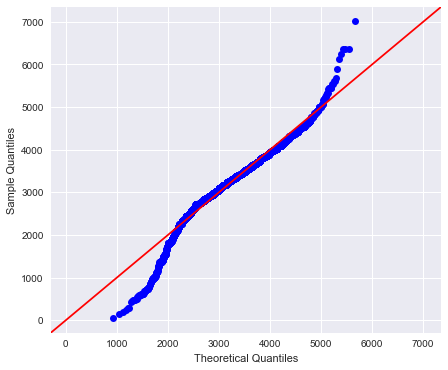

In [115]:
sm.qqplot(df['birthwgt_g'].dropna(), norm_like_weight, line='45')
plt.gcf().set_size_inches(7,6)

### The central limit theorem

<BarContainer object of 5 artists>

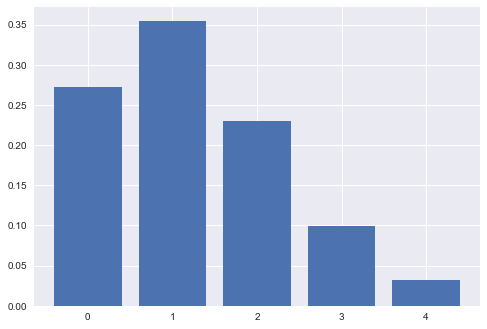

In [116]:
rate = 1.3

poisson = stats.poisson(rate)

xs = range(5)
plt.bar(xs, poisson.pmf(xs))

In [117]:
size = 1000
rs = poisson.rvs(size)

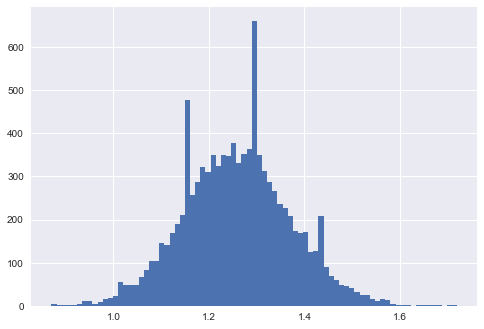

In [118]:
means = np.array([np.random.choice(rs, size=100).mean() for _ in range(10000)])
plt.hist(means, bins=np.linspace(means.min(), means.max(), 80));

# Further reading

https://greenteapress.com/wp/think-stats-2e/

https://en.wikipedia.org/wiki/Correlation_and_dependence

https://www.cdc.gov/nchs/nsfg/index.htm?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fnchs%2Fnsfg.htm

https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance

https://xkcd.com/882/

https://projecteuclid.org/euclid.ss/1009213726